In [2]:
import time # 파이썬의 기본 내장함수로 시간관련 라이브러리
import matplotlib.pyplot as plt # 시각화를 위환 라이브러리 
import numpy as np # 다양한 계산 ex)행렬과 같은 계산을 할 수 있게 해주는 라이브러리
import torch #pytorch 인공지능 및 딥러닝 모델을 구축하고 학습하기 위한 오픈 소스 딥러닝 라이브러리
import torch.nn as nn # neural network의 약자로, 신경망 모델을 구성하는 데 사용되는 다양한 레이어, 손실 함수, 초기화 함수등을 포함하는 라이브러리
import torch.utils.data as data # pytorch에서 데이터셋을 로드하고 전처리하는데 사용되는 유틸리티 함수와 클래스를 제공하는 함수
from matplotlib.colors import to_rgba # 그래프에 색깔 넣기 위한 도구
from torch import Tensor # 텐서를 많이 쓸것 같으니 그냥 클래스 하나를 따로 import함
import torch.nn.functional as F #신경망 구성에 필요한 다양한 함수를 제공하는 모듈로, 활성화 함수 (ReLU, sigmoid,hanh 등), 컨볼루션 연산, 풀링 연산 등 다양한 연산을 포함한 라이브러리 내의 함수형 API
import torch.utils.data as data # 파이토치의 유틸리티 모듈 중 데이터 처리 관련 모듈을 가져와 (Dataset, DataLoader, random_split)
from tqdm.notebook import tqdm


In [3]:
print("Using torch", torch.__version__) # torch버전 확인 
#+cu117 ==cuda 11.7 과 호환되도록 빌드되었다.

Using torch 2.0.1+cu117


In [4]:
torch.manual_seed(42) 
# 시드를 설정하여 난수를 생성할 때 동일한 난수가 나오게 만듬
# 동일한 난수를 생성? -> 난수를 생성한다는게 무작위 수를 만든다는게 아니라 특정 알고리즘에 의해 어떠한 수를 생성하는거임 근데 시드42를 기반으로 알고리즘을 돌려준다고 하면 게속 같은 난수가 나오는거
# 시드? -> 난수 생성 과정에서 시작점을 지정하는 역할, 그냥 초기값이라 생각하면 됨
# 왜 이런짓을? -> 재현가능하게 만들어야 하는데 돌릴때마다 결과값이 달라지면 제대로 하고 있는지 헷갈려서

In [5]:
x =Tensor(2,3,4) # 3*4 행렬 2개 
print(x)

tensor([[[ 2.5152e+26,  4.5595e-41,  6.4097e-35,  0.0000e+00],
         [ 1.3749e+26,  4.5595e-41, -2.6895e+17,  4.5594e-41],
         [ 1.5155e+26,  4.5595e-41, -2.6878e+17,  4.5594e-41]],

        [[ 1.5157e+26,  4.5595e-41,  1.4683e+26,  4.5595e-41],
         [-2.6896e+17,  4.5594e-41, -2.6846e+17,  4.5594e-41],
         [ 1.5155e+26,  4.5595e-41,  1.5271e+26,  4.5595e-41]]])


torch.Tensor는 pytorch에서 다차원 배열을 나타내는 클래스임<br>
이 클래스를 이용하면 새로운 텐서를 생성할 때, 이미 메모리에 할당되어 있는 값을 재사용할 수 있음.<br>
<pre>ex) a = 10<br>
    b = a (a가 참조하는 값 10을 재사용)</pre>
이렇게 하면 메모리 절약 이득 && 귀찮게 다시 할당할 필요도 없음 :D


In [6]:
x1 = torch.zeros(1,2,3) # 0으로 가득찬 텐서
x2 = torch.ones(2,2,3) # 1로 가득찬 텐서
x3 = torch.rand(3,2,3) # 0과 1 사이에서 균일하게 샘플링된 임의의 값으로 채워진 텐서
x4 = torch.randn(4,2,3) # 평균이 0 이고 분산이 1인 정규 분포에서 샘플링된 임의의 값으로 체워진 텐서
x5 = torch.arange(3,7,2) # 정해진 규칙으로 텐서를 생성 (시작, 끝, 몇 칸씩 움직일 건지)
x6 = torch.Tensor(2,2,3) # 자기 멋대로 값을 채운 텐서 생성
# 샘플링? -> 통계학 또는 확률론에서 주어진 분포로부터 데이터 포인트를 추출하는 과정
# 데이터 포인트? - > 데이터 집합에서 개별적으로 측정된 하나의 관측값
for i in range(1,7):
    xi = eval('x' + str(i)) #eval()문자열을 그냥 코드로 보고 실행시킴, 보안상 안 좋으니 외부 입력이 있을 시 사용 하지 말 것!
    print('x{}\n{}'.format(i,xi))

x1
tensor([[[0., 0., 0.],
         [0., 0., 0.]]])
x2
tensor([[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]])
x3
tensor([[[0.8823, 0.9150, 0.3829],
         [0.9593, 0.3904, 0.6009]],

        [[0.2566, 0.7936, 0.9408],
         [0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411],
         [0.4294, 0.8854, 0.5739]]])
x4
tensor([[[-0.4974,  0.4396, -0.7581],
         [ 1.0783,  0.8008,  1.6806]],

        [[ 0.3559, -0.6866,  1.5736],
         [-0.8455,  1.3123,  0.6872]],

        [[-1.0892, -0.3553, -0.9138],
         [-0.6581,  0.0499,  2.2667]],

        [[ 1.1790, -0.4345, -1.3864],
         [-1.2862, -1.4032,  0.0360]]])
x5
tensor([3, 5])
x6
tensor([[[6.4611e-35, 0.0000e+00, 0.0000e+00],
         [7.0065e-45, 0.0000e+00, 0.0000e+00]],

        [[1.6605e-42, 0.0000e+00, 2.5151e+26],
         [4.5595e-41, 2.5151e+26, 4.5595e-41]]])


텐서란?<br>
다차원 배열을 표현하기 위한 데이터 구조<br>
벡터, 행렬, 같은 것들

In [7]:
x = Tensor([[1,2], [3,4]]) # 리스트 두개를 하나로 묶어서 텐서를 생성할 수 있다.
print(x)

tensor([[1., 2.],
        [3., 4.]])


In [8]:
x = torch.rand(2,3,4)
shape = x.shape 
print("Shape:", x.shape)
print("Type:",type(shape))

size = x.size()
print("Size:", size)
print("Type:",type(size))
dim1, dim2, dim3 = x.size()

print("Size:", dim1, dim2, dim3)

# shape와 size 모두 텐서의 모양을 알려준다
# 옛날에는 몰라도 지금은 타입도 같고 출력 형태도 같음

Shape: torch.Size([2, 3, 4])
Type: <class 'torch.Size'>
Size: torch.Size([2, 3, 4])
Type: <class 'torch.Size'>
Size: 2 3 4


In [9]:
np_arr = np.array([[1,2], [3,4]]) 
tensor = torch.from_numpy(np_arr) # numpy를 tensor로 전환

print("Numpy array:", '\n', np_arr) 
print("PyTorch tensor:",'\n', tensor)
print(tensor.device) # 텐서가 gpu에 있는지 cpu에 있는지 출력

tensor = tensor.numpy() # 텐서를 numpy로 변환하기 위해서는 텐서가 cpu에 있어야 한다, ex) np_arr = tensor.cpu().numpy()
print("convert tnesor to numpy:", '\n', tensor)

Numpy array: 
 [[1 2]
 [3 4]]
PyTorch tensor: 
 tensor([[1, 2],
        [3, 4]])
cpu
convert tnesor to numpy: 
 [[1 2]
 [3 4]]


In [10]:
torch.manual_seed(42)  # x1,x2 각 텐서들의 원소들이 항상 같은 수들로 채워짐
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)
y = x1 + x2 # 같은 위치에 있는 원소끼리 더함

print("x1", x1)
print()
print("x2", x2)
print()
print("y", y)

x1 tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

x2 tensor([[0.2566, 0.7936, 0.9408],
        [0.1332, 0.9346, 0.5936]])

y tensor([[1.1388, 1.7086, 1.3236],
        [1.0925, 1.3250, 1.1945]])


In [11]:
x1 = torch.rand(2,3)
x2 = torch.rand(2,3)

print("x1:", x1)
print("x2:", x2)
print()
x2.add_(x1) # 텐서의 메모리에 직접 적용되는 내부연산, 내부연산은 일반적으로 함수명에 _을 붙여준다
print("x2 add to x1:",'\n', x2) # x2를 호출해도 x1과 합쳐지기 전이 아닌 합쳐진 x2가 출력된다는걸 말하고 싶었나 봄


x1: tensor([[0.8694, 0.5677, 0.7411],
        [0.4294, 0.8854, 0.5739]])
x2: tensor([[0.2666, 0.6274, 0.2696],
        [0.4414, 0.2969, 0.8317]])

x2 add to x1: 
 tensor([[1.1360, 1.1952, 1.0107],
        [0.8708, 1.1824, 1.4056]])


In [12]:
x = torch.arange(6)
print("x:", x)

x = x.view(2,3) # 2행 3열로
print("x:", x)

x = x.permute(1,0) # transpose
print("x", x)

x: tensor([0, 1, 2, 3, 4, 5])
x: tensor([[0, 1, 2],
        [3, 4, 5]])
x tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [13]:
x = torch.arange(6)
x = x.view(2,3)
print("X", x)

W = torch.arange(9).view(3, 3)
print("W", W)

h = torch.matmul(x,W) # 행렬 곱
print("h", h)


X tensor([[0, 1, 2],
        [3, 4, 5]])
W tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
h tensor([[15, 18, 21],
        [42, 54, 66]])


In [14]:
x = torch.arange(12).view(3,4)
print("X", x)
print(x[:, 1]) # 각 행의 1번째 요소
print(x[0]) # 0번째 행
print(x[:2, -1]) # 0~1까지 행에서 마지막 요소
print(x[1:3, :]) # 1~2까지 행에서 처음부터 끝까지 

X tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([1, 5, 9])
tensor([0, 1, 2, 3])
tensor([3, 7])
tensor([[ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


pytorch는 우리가 정의한 함수의 기울기/도함수를 자동으로 계산해 줄 수 있다<br>
-> 왜 이게 필요한가? -> 우리가 어떤 것을 예측할 때 딥러닝을 사용 -> 어? 그런데 예측값이 실제랑 너무 차이나네...<br>
-> 문제는 가중치가 잘못 설정 된거 -> 그러면 가중치를 어떻게 잘 맞출 수 있을까?<br>
 ->바로 그래디언트(다변수 함수의 편미분 벡터, 즉 함수의 값이 가장 빠르게 증가하는 방향!) (그냥 다변수 함수에서의 기울기라 생각) <br>
 -> 기울기는 왜? -> 실제 값과 예측값의 차를 그래프로 그린 후 그 최소점을 가중치로 설정할건데 그 때 기울기가 0이 되는 부분이 최소점이 되는거임<br>
 -> 근데 극소값이 없는 그래프는? -> 그러면 기울기가 가장크게 증가 또는 감소 하는 방향을 찾아서 그나마 제일 작은 값을 가중치로 쓰는거지 뭐 어쩌겠으

In [15]:
x = torch.ones((3,))
print(x.requires_grad) # gradient 필요한지


False


In [16]:
x.requires_grad_(True) # 그래디언트 필요하다고 
print(x.requires_grad)

True


In [17]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # 0~3까지 ,실수형으로 그래디언트 사용할 수 있게 만들어
print("x:", x)

x: tensor([0., 1., 2.], requires_grad=True)


In [18]:
a = x + 2
print("a",a)
b = a**2
print("b",b)
c = b + 3
print("c",c)
y = c.mean() # 각 요소들을 더하고 요소의 수만큼 나눔 
print("Y", y)
y.backward()  
# y에 대한 역전파(backpropagation)를 수행하며 y에 대한 gredient를 계산
# 이 값에 따라 .requires_grad(True)를 호출한 텐서 x의 그래디언트도 계산되어 x.grad에 저장
# .backward() 함수는 스칼라 출력에 대해서만 자동으로 그래디언트를 계산할 수 있다.
print(x.grad) # x의 미분값... 어케 구했는데...



a tensor([2., 3., 4.], grad_fn=<AddBackward0>)
b tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>)
c tensor([ 7., 12., 19.], grad_fn=<AddBackward0>)
Y tensor(12.6667, grad_fn=<MeanBackward0>)
tensor([1.3333, 2.0000, 2.6667])


y를 x에 대한 함수로 보고 미분 값을 구한다.<br>
1. y = 1/3*c -> (y)'= 1/3<br>
2. c = b + 3 -> (c)'= 1<br>
3. b = a **2 -> (b)' = 2a<br>
4. a = x + 2 -> (a)' = 1<br>
즉, y =1/3[{(x+2)**2}+3]= 1/3(x^2+4x+7) -> (y)' 2/3x+4/3  (전개해서 미분) == 1/3*1*2a*1 =2a/3 =2x/3+4/3 (연쇄법칙으로 미분)<br>
그래디언트는 2a/3 = 2/3*[2.,3.,4.] ==[1.3333, 2., 2.6667]


In [19]:
gpu_avail = torch.cuda.is_available() # gpu사용 가능한지
print(f"IS the GPU availabe? {gpu_avail}")
#컴퓨터에 gpu가 있는데 안된다고 한다면 CUDA버전이 올바르게 설치 되어있는지 확인

IS the GPU availabe? True


In [20]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# 만약 쿠다 사용가능하면 쿠다를 device에 아니면 cpu를 device에 저장해라
# 왜 이런짓을 할까? -> 그것은 텐서는 기본적으로 cpu에 저장되는데 간단한 연산처리를 많이 할 때는 gpu가 더 빠르단 말이징
# 그러니 gpu를 쓸 수 있을 땐 gpu를 쓸려고 미리 초기화 시켜두는거임, 나중에 if device == cuda 어쩌고 저쩌고 할려고, 
# 그냥 할때 device = torch.device("cuda")를 쓰면 되잖아 -> 내가 할 때마다 gpu있는지 없는지 확인하고 또 코드짜기 귀찬잖아
print("Device", device)

Device cuda


In [21]:
x = torch.zeros(2,3)
x = x.to(device) # device에 푸시 (device에 대해서는 윗 셀에 명시함)
print("x:",'\n', x)
# cuda:0 은 컴퓨터의 0번째 gpu장치라는 뜻
# 그럼 2번째 3번째도 있음? -> 있음, gpu살 돈만 있다면 여러개 넣어서 병렬 계산으로 시간 단축 크게 가능 \(>.<)/, 그리고 pytorch는 다중 gpu지원해줌 근데 매우매우 큰 학습이 필요한게 아니면 필요없음


x: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]], device='cuda:0')


자 그러면 gpu랑 cpu랑 계산속도가 얼마나 차이가 날까?<br>
시간은 없을 때 얼마나 걸릴지 예측하며 희망을 갖는 습관은 매우 중요하므로 gpu와 cpu의 계산속도를 한번 비교해보자.

In [22]:
x = torch.randn(5000, 5000) #정규분포에서 샘플링한 값으로 채워진 5000행 5000열의 행렬
start_time = time.time() # 현재시간을 초 단위로 반환
_ = torch.matmul(x, x) #텐서끼리 곱해라
end_time = time.time() #현재시간을 초 단위로 반환
print(f"CPU time: {(end_time - start_time):6.5f}s") # 끝 시간 - 시작시간을 전체길이 6 소수점 이하 5자리까지 표현해라

if torch.cuda.is_available(): # 쿠다 사용 가능하면
    x = x.to(device) # 쿠다에 푸쉬
    start = torch.cuda.Event(enable_timing=True) # cuda 이벤트를 생성, 옵션으로 생성된 이벤트를 시간측정에 사용할 수 있게함
    end = torch.cuda.Event(enable_timing=True)
    start.record() # 연산이 시작되는 시점 표시
    _ = torch.matmul(x, x) # 행렬 곱
    end.record() # 연산이 끝나는 시점 표시
    torch.cuda.synchronize() # gpu연산이 완료될 때가지 cpu가 기다리게 해라
    # gpu는 비동기적 cpu는 동기적 -> gpu 연산 다 안끝났는데 cpu가 지 할거 다하고 나중에 gpu연산 끝난거 기록하거나 다 안 끝나는데 기록 할 수도 있음
    print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")

CPU time: 0.22281s
GPU time: 1.92573s


In [23]:
if torch.cuda.is_available():
    torch.cuda.manual_seed(42) # cuda에 시드 설정 (cpu와 gpu간의 시드가 동기화 되지 않아요)
    torch.cuda.manual_seed_all(42) # 모든 cuda 장치에 시드 설정


torch.backends.cudnn.deterministic = True
# CuDNN(테슬라GPU를 위한 NVIDA의 딥 네트워크 라이브러리)의 동작을 결정록적으로 만들어 실험결과의 재현성 보장
# 비결정적 알고리즘이 종종 결정론적 알고리즘보다 더 빠르게 작동하므로 이는 선택
# NVIDA에서 만든 GPU라면 다 사용 가능
# 비결정적 알고리즘이 뭔데? -> 주어진 입력에 대해 항상 동일한 결과를 생성하지 않는 알고리즘
torch.backends.cudnn.venchmark = False
# 각 레이어에 대해 여러가지 컨볼루션 알고리즘(수학적 연산 알고리즘)을 테스트하여 가장 빠른 알고리즘을 선택하는 기능을 끈다
# 왜? -> 입력 데이터의 크기가 변하면 변경될 때마다 다시 테스트를 수행하는게 싫어서


In [24]:
class MyModule(nn.Module): # 파이토치에서 신경망을 구성하는 기본 단위 '모듈', nn.Module 클래스를 상속받은 사용자 정의 클래스를 의미한다
    def __init__(self):
        super().__init__ # 상위 클래스의 __init__메소드를 호출하기 위해 super() 사용

    def forward(self, x): # 모듈의 계산이 이루어지는 곳
        pass
# 이 형태가 모듈의 기본 틀

In [25]:
class SimpleClassifier(nn.Module):
    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        self.linear1 = nn.Linear(num_inputs, num_hidden) 
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)
    
    def forward(self, x):
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x
     

# __init__(self, num_inputs, num_hidden, num_outputs):
num_inputs: 입력층의 노드 수, 입력 데이터의 특성 수와 일치해야 한다 <br>
num_hidden: 은닉층의 노드 수를 지정합니다.이 값은 사용자가 임의로 설정 가능 <br>
num_outputs: 출력층의 노드 수를 지정, 이 값은 예측하려는 클래스 수와 일치해야 한다. <br>

# self.act_fn = nn.Tanh()
<pre>
활성화 함수인 하이퍼볼릭 탄젠트 함수를 설정
활성화 함수는 신경망의 각 뉴런에서 값을 결정하는 데 사용되며, 비선형성을 모델에 도입하는데 중요한 역할을 한다
-> 비선형성이 있어야 신경망이 복잡한 패턴을 학습하기 좋음
-> 하이퍼볼릭 탄젠트 함수가 뭐임? -> -1과 1 사이의 값을 출력하는 S-형 함수로 시그모이드 함수와 비슷하지만 출력 범위가 더 넓음



# self.linear1 = nn.Linear(num_inputs, num_hidden)
<pre>
nn.Linear는 입력과 가중치 사이의 선형 변환을 수행하는 레이어
num_inputs (입력의 차원 수) 와 num-hidden(출력의 차원 수)를 입력 받는다


# self.linear2 = nn.Linear(num_hidden, num_outputs)
<pre>
은닉층과 출력층 사이의 선형 레이어로 은닉 레이어의 뉴런 수와 최종 출력 뉴런의 수를 받는다


### x = self.linear1(x)
<pre>
입력 데이터 x가 첫 번째 선형 레이어를 통과하고 선형 변환된 결과를 x에 저장
</pre>
### x = self.act_fn(x)
<pre>
이 함수는 x에 비선형 변환을 적용하고 그 결과를 x에 저장
</pre>
### x = self.linear2(x)
<pre>
x가 두 번째 선형 레이어를 통과하며 선형 변환을 적용하고 x에 저장
</pre>

In [26]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)
# 입력 두개 받고 은닉층 4개에 thnh를 이용해 출력값 1나를 내놓는 모델

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


In [27]:
for name, param in model.named_parameters(): # 파이토치 모델의 모든 매개변수 이름과 값을 반환하는 매소드
    print(f"Parameter {name}, shape {param.shape}")
#입력과 출력의 뉴런 개수를 볼 수 있다 :D

Parameter linear1.weight, shape torch.Size([4, 2])
Parameter linear1.bias, shape torch.Size([4])
Parameter linear2.weight, shape torch.Size([1, 4])
Parameter linear2.bias, shape torch.Size([1])


In [28]:
class XORDataset(data.Dataset): # Dataset 클래스를 인수로 받아라
    def __init__(self, size, std=0.1): 
        # size: 생성하려는 데이터 포인트의 수,
        # std: 노이즈의 표준편차, 표준편차는 기본값이 0.1
        super().__init__()  #Dataset 클래스를 상속받을 때 Dataset의 생성자를 호출하여 초기화
        self.size = size
        self.std = std
        self.generate_continuous_xor() # 매서드 호출, 파이썬에서 클래스 정의는 순차적으로 처리가 아님 걍 메서드가 클래스의 일부로 존재하고 있으면 호출 가능
    
    def generate_continuous_xor(self):
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        # low: 생성할 무작위 수의 최솟값 범위를 지정
        # high: 생성할 무작위 수의 최댓값 범위 지정
        # size=(행, 열)(데이터포인트의 수, 각 데이터 포인트에 두 개의 값이 들어갈 것임을 의미)

        label = (data.sum(dim=1) == 1).to(torch.long)
        # dim = 1 -> 텐서의 각 행에 대해 합계를 계산
        # da.tasum(dim=1) == 1이면 True(1) 아니면 False(0) 반환
        # .to(torch.long) -> 불리언 텐서를 정수(long)으로 변환
        # dim은 언제 정의 한거임? -> dim은 텐서의 특정 차원을 가리키기 위해 사용하는 인자, 2차원에서는 dim =0은 행 , dim =1은 열
        data += self.std * torch.randn(data.shape)
        # 가우시안 노이즈를 추가하여, 모델이 노이즈가 있는데이터에도 잘 일반화 할 수 있도록 만들어 줌
        self.data = data
        self.label = label
    
    def __len__(self):
        return self.size #우리가 가지고 있는 데이터 포인트의 수
    
    def __getitem__(self, idx):
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label #idx번째 데이터 포인트를 반환
    

In [29]:
dataset = XORDataset(size=2000)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

Size of dataset: 2000
Data point 0: (tensor([ 1.1837, -0.1897]), tensor(1))


# XORDataset 부분 잘 모르겠음
왜 해당 클래스에 저런 메서드를 만드는지 어떻게 작동하는지 잘 모르겠음


In [30]:
def visualize_samples(data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label - label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
   

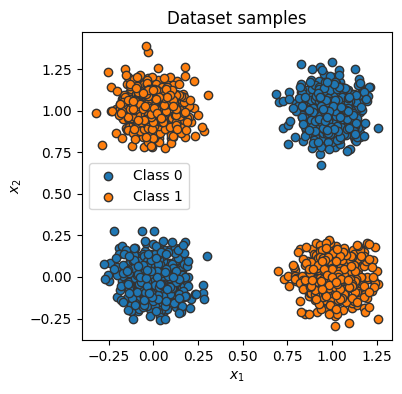

In [31]:
visualize_samples(dataset.data, dataset.label)
plt.show()

In [32]:
data_loader = data.DataLoader(dataset, batch_size=8, shuffle =True)
# data.DataLoader(): 데이터셋에서 데이터를 미니배치로 쉽게 로드할 수 있게 해주는 유틸리티
# batch_size: 배치당 쌓을 샘플 수
# shuffle = True: 데이터를 무작위로 반환
# num_workers: 데이터 로드에 사용할 하위 프로세스 수, 기본값은 0, 멀티코어 CPU에서 로딩 속도를 향상시키기 위해 사용
# pin_memory : True인 경우 데이터 로더는 Tensor를 반환하기 전에 CUDA고정 메모리에 복사 -> GPU의 대규모 데이터 포인트에 대한 시간을 절약할 수 있다.
# drop_last : True인 경우 지정된 배치 크기보다 작은 경우 마지막 배치 삭제 -> 일관된 배치 크기를 유지하는데 사용


In [33]:
data_inputs, data_labels = next(iter(data_loader))
# next(iter())는 첫번째 배치를 잡아냅니다
# shuffle이 True인 경우, 매번 다른 결과를 반환
# 'for Bathch in data_loader:반복문' 로 전체 데이터 세트를 반복해서 사용 가능
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

Data inputs torch.Size([8, 2]) 
 tensor([[-1.7701e-01,  1.8564e-01],
        [-6.6408e-02,  1.0999e+00],
        [ 9.8798e-01, -5.4761e-04],
        [-1.7270e-02,  8.8517e-01],
        [-8.9612e-02,  8.3687e-02],
        [ 3.4311e-03,  9.4478e-02],
        [ 8.0146e-02, -1.4031e-01],
        [ 1.1159e+00,  9.6001e-01]])
Data labels torch.Size([8]) 
 tensor([0, 1, 1, 1, 0, 0, 0, 0])


In [34]:
loss_module = nn.BCEWithLogitsLoss() #실제 레이블과 예측 확률 사이의 차이를 측정
# pytorch에는 배치의 손실을 계산하기 위한 함수가 2개가 있음
# BCELOSS() 입력값 x가 시그모이드의 출력 [0,1]에 있을 것으로 예상
# BCEWithLogitsLoss는 시그모이드 레이어와 BCE 손실을 단일 클래에 결합 -> 손실 함수가 로그에 적용되어 수치적으로 더 안정적
# ????-> 시그모이드 함수는 입력 값이 매우 높거나 낮을 때 그래디언트가 매우 작아지는 문제를 일으킬 수 있음-> ex) 입력값이 0에 가가워질수록 출력이 무한히 감소
# BCEWithLogisLoss는 내부에서 로그 합을 하여 중간 단계에서 매우 작거나 큰 숫자를 다룰 필요가 없어져서 수치적 안정성이 높아짐


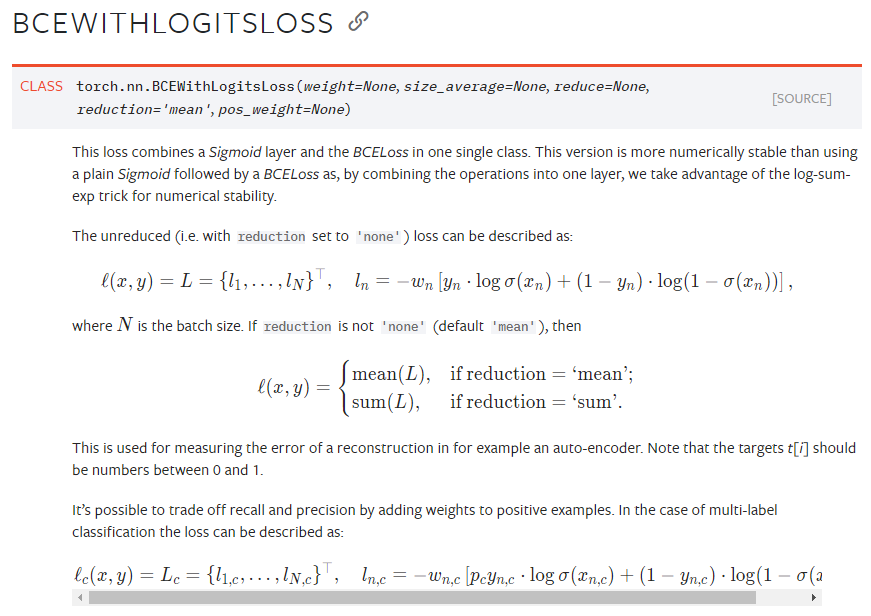

In [35]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# 매개변수 업데이트를 위한 패키지
# 경사도에 확습률이라는 작은 상수를 곱하고 이를 매개변수에서뺀 후 매개변수를 업데이트


In [36]:
train_dataset = XORDataset(size=1000)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)


In [37]:
model.to(device)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)

In [38]:
def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # 학습 모드 설정 -> 드롭아웃 및 배치 정규화, 그래디언트 계산을 가능하게,모델의 파라미터를 업데이트할 수 있도록 한다.
    model.train()

    # 훈련루프
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            # 1.gpu 사용가능하면 gpu에 넣기
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)

            # 2. 입력값을 모델에 돌리기
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)  # 배치의 각 요소에 대한 예측 결과를 담고 있는 1차원 텐서를 얻고자 할 때 사용

            # 3. 손실 계산
            loss = loss_module(preds, data_labels.float())

            # 4. 역전판 계산
            # 그래디언트를 계산하기전에 기울기를 모두 0으로 -> 왜? -> 각 에폭마다 독립적인 그래디언트를 업데이트 하기 위해서
            optimizer.zero_grad()
            # 역전파 수행
            loss.backward()

            # 5. 계산된 그래디언트를 사용하여 모델의 가중치 업데이트
            optimizer.step()

In [39]:
train_model(model, optimizer, train_data_loader, loss_module)

  0%|          | 0/100 [00:00<?, ?it/s]

In [40]:
state_dict = model.state_dict() #state_dict(학습 가능한 모든 매개변수 ) 추출 
print(state_dict)

OrderedDict([('linear1.weight', tensor([[ 2.1200, -2.6936],
        [-1.9972, -2.2879],
        [-0.1440, -0.2389],
        [ 2.2179, -0.8282]], device='cuda:0')), ('linear1.bias', tensor([-1.0881,  0.5174,  0.0371, -0.1196], device='cuda:0')), ('linear2.weight', tensor([[ 2.8743, -2.9780,  0.1054, -2.5931]], device='cuda:0')), ('linear2.bias', tensor([0.1230], device='cuda:0'))])


In [41]:
torch.save(state_dict, "our_model.tar")

In [43]:
state_dict = torch.load("our_model.tar")

new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict) # state_dict에 저장된 매개변수를 new_model의 매개변수로 로드하는 데 사용

print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

Original model
 OrderedDict([('linear1.weight', tensor([[ 2.1200, -2.6936],
        [-1.9972, -2.2879],
        [-0.1440, -0.2389],
        [ 2.2179, -0.8282]], device='cuda:0')), ('linear1.bias', tensor([-1.0881,  0.5174,  0.0371, -0.1196], device='cuda:0')), ('linear2.weight', tensor([[ 2.8743, -2.9780,  0.1054, -2.5931]], device='cuda:0')), ('linear2.bias', tensor([0.1230], device='cuda:0'))])

Loaded model
 OrderedDict([('linear1.weight', tensor([[ 2.1200, -2.6936],
        [-1.9972, -2.2879],
        [-0.1440, -0.2389],
        [ 2.2179, -0.8282]])), ('linear1.bias', tensor([-1.0881,  0.5174,  0.0371, -0.1196])), ('linear2.weight', tensor([[ 2.8743, -2.9780,  0.1054, -2.5931]])), ('linear2.bias', tensor([0.1230]))])


In [44]:
test_dataset = XORDataset(size=500)
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False)

In [45]:
def eval_model(model, data_loader) :
    model.eval() #평가모드
    true_preds, num_preds = 0.0, 0.0

    with torch.no_grad(): # 모델을 평가할 때 기울기를 계산할 의도가 없으므로 계산 그래프를 추적할 필요가 없음
        # with이 뭔지 알아낼 것!!!!!!!!!
        for data_inputs, data_labels in data_loader:
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # 0과 1 사이의 예측을 매핑하는 시그모이드
            pred_labels = (preds >= 0.5).long() # 예측을 0과 1로 이진화

            true_preds += (pred_labels == data_labels).sum() # TP+TN
            # (pred_labels == data_labels) 각 요소를 비교하여 불리언 텐서를 생성 True=1 (예측 맞음) ,False = 0(예측 틀림)
            num_preds += data_labels.shape[0] #TP+TN+FP+FN
            #data_labels.shape[0] 이 텐서의 첫 번째 차원의 크기, 즉 배치의 크기로, 배치에 있는 데이터 포인트의 수
            # 배치? -> 전체 데이터셋을 작은 그룹으로 나누어 각 그룹별로 모델을 학습시키는 단위 
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc: 4.2f}%")

In [46]:
eval_model(model, test_data_loader)

Accuracy of the model:  100.00%


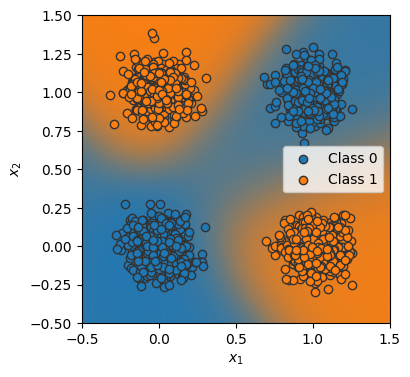

In [50]:
@torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, Tensor):
        data = data.cpu().numpy()
    if isinstance(label, Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0] # label ==0인 값을 텐서에 저장
    data_1 = data[label == 1]

    plt.figure(figsize=(4, 4))
    plt.scatter(data_0[:, 0], data_0[:, 1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:, 0], data_1[:, 1], edgecolor="#333", label="Class 1")
    plt.ylabel(r"$x_2$") # y축 레이블의 x_2를 나타냄
    plt.xlabel(r"$x_1$")
    plt.legend()

    model.to(device)
    c0 = Tensor(to_rgba("C0")).to(device) # c0의 색상 코드를 받아 해당 색상의 RGBA값을 반환 후 장치로 푸쉬
    c1 = Tensor(to_rgba('C1')).to(device)
    x1 = torch.arange(-0.5, 1.5, step= 0.01, device = device)
    x2 = torch.arange(-0.5, 1.5, step= 0.01, device = device)
    xx1, xx2 = torch.meshgrid(x1,x2)
    model_inputs = torch.stack([xx1, xx2], dim =-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)

    output_image = (1 - preds) * c0[None, None] + preds * c1[None, None]
    output_image = (
        output_image.cpu().numpy()
    )
    plt.imshow(output_image, origin="lower", extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)

visualize_classification(model, dataset.data, dataset.label)
plt.show()